### Testing If It Works

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
token="6fleEwwq9L-IuQK-IEgCAE9aSIsmZenmalLLDnUi_ZTq",
instance="crn:v1:bluemix:public:quantum-computing:us-east:a/31c2c758dece41c2b653e2cac7d1806f:f4266096-2778-4b43-b4a4-37038f3bf8fd::", overwrite=True
)

In [9]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
sampler = StatevectorSampler()
result = sampler.run([qc], shots=1024).result()
print(result[0].data.meas.get_counts())

{'11': 541, '00': 483}


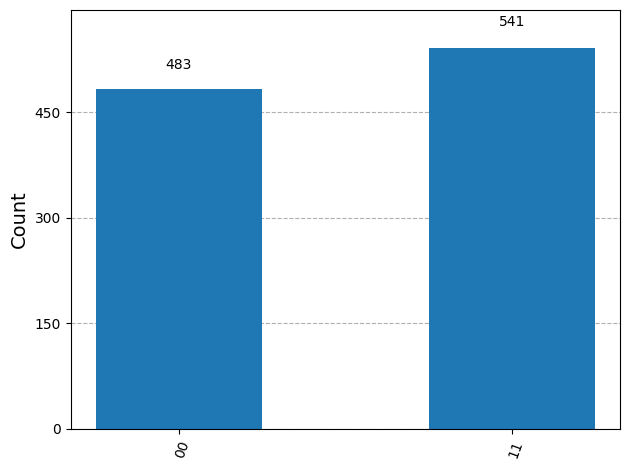

In [10]:
# Uncomment lines 2 and 8 if you are not using Python in a Jupyter notebook
# import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
 
counts = result[0].data.meas.get_counts()
plot_histogram(counts)
 
# plt.show()

# HW 1

### Problem 1

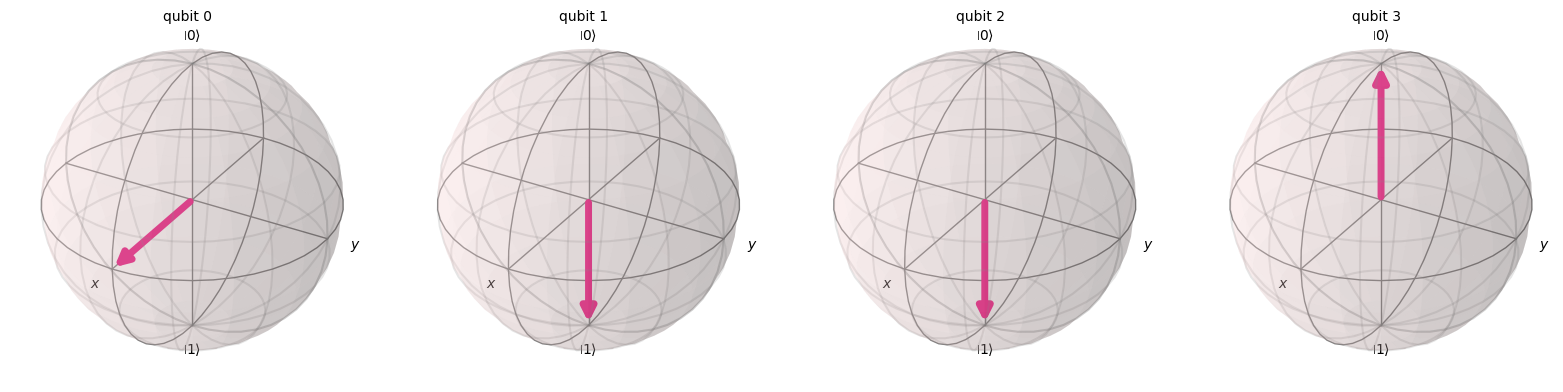

In [14]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
qc = QuantumCircuit(4)
qc.h(0)
qc.x(1)
qc.y(2)
qc.z(3)
state = Statevector.from_instruction(qc)

plot_bloch_multivector(state)

### Problem 2

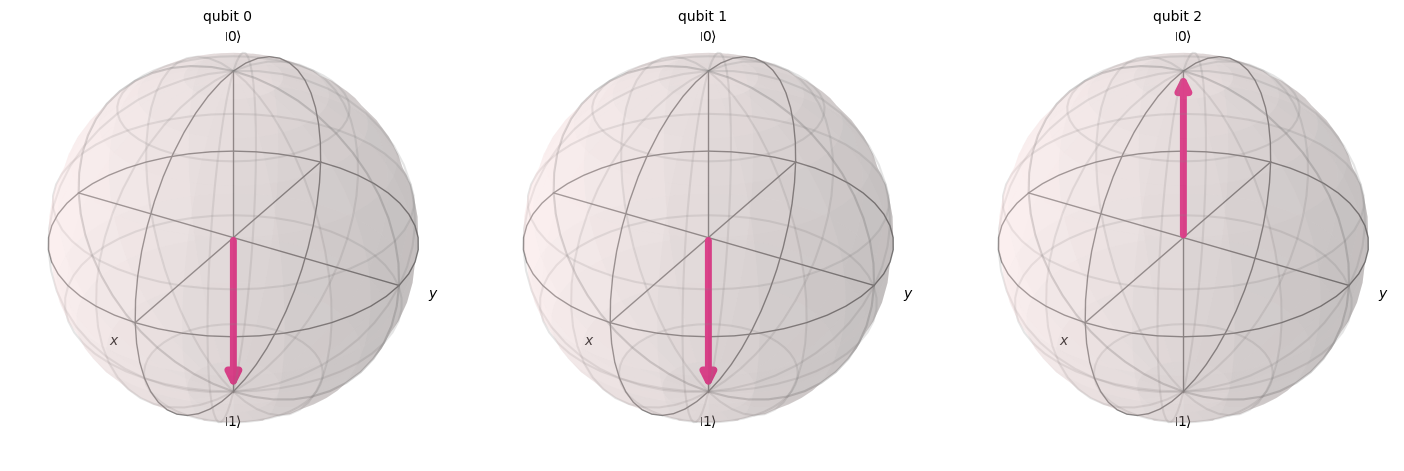

In [15]:
import numpy as np

qc = QuantumCircuit(3)
theta = np.pi
qc.rx(theta, 0)
qc.ry(theta, 1)
qc.rz(theta, 2)
state = Statevector.from_instruction(qc)

plot_bloch_multivector(state)

### Problem 3

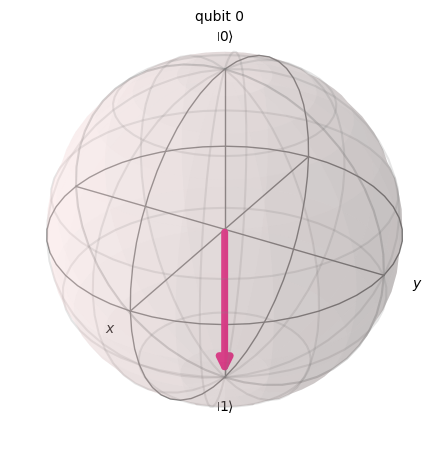

In [18]:
# Create a quantum circuit that implements STP(θ) Y|0⟩ , for some angle θ, followed by mea-
# surement in the computational basis.
#  (a) Plot the state vector at each gate output on a Bloch sphere.
#  (b) Run the circuit on the simulator and plot the histogram of the count.
#  (c) Run it on the quantum computer and plot the histogram of the count.

from qiskit.circuit.library import YGate, PhaseGate, TGate, SGate
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# a
state = Statevector.from_label('0')
list_states = []
list_states.append(state)
theta = np.pi/2

state = state.evolve(YGate())
list_states.append(state)

state = state.evolve(PhaseGate(theta))
list_states.append(state)

state = state.evolve(TGate())
list_states.append(state)

state = state.evolve(SGate())
list_states.append(state)

plot_bloch_multivector(state)

In [19]:
# b: 

import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1,1)
qc.y(0)
qc.p(theta,0)
qc.t(0)
qc.s(0)
qc.measure(0,0)

backend = AerSimulator()
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()

counts = result.get_counts(tqc)

fig = plot_histogram(counts)
fig.savefig('histogram_aer.png')
plt.show()

In [21]:
# c
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import transpile

service = QiskitRuntimeService()

# find least busy physical quantum computer
backend = service.least_busy(operational=True, simulator=False)
print(f"Submitting to: {backend.name}")

tqc = transpile(qc, backend)

sampler = Sampler(mode=backend)

# submit da job
job = sampler.run([tqc])
result = job.result()

pub_result = result[0] # indexed at zero because only one circuit was simulated

# access counts from classical register
counts = pub_result.data.c.get_counts()

fig = plot_histogram(counts)
fig.savefig('histogram_ibmfez.png')
plt.show()

Submitting to: ibm_fez


### Problem 4

Same as Problem 3 (b) & (c) but the measurement is in the Hadamard basis.

In [12]:
# b

qc_h = QuantumCircuit(1, 1)
qc_h.y(0)
qc_h.p(theta, 0)
qc_h.t(0)
qc_h.s(0)


qc_h.h(0) # apply h at the end
qc_h.measure(0, 0)

backend = AerSimulator()
tqc = transpile(qc_h, backend)
job = backend.run(tqc, shots=1000)
result = job.result()

counts = result.get_counts(tqc)

fig = plot_histogram(counts)
fig.savefig('histogram_aer_h.png')
plt.show()


In [13]:
# c
service = QiskitRuntimeService()

backend = service.least_busy(operational=True, simulator=False)
print(f"Submitting to: {backend.name}")

tqc = transpile(qc_h, backend)

sampler = Sampler(mode=backend)

job = sampler.run([tqc])
result = job.result()

pub_result = result[0] 

counts = pub_result.data.c.get_counts()

fig = plot_histogram(counts)
fig.savefig('histogram_ibmfez_h.png')
plt.show()

Submitting to: ibm_fez
